In [20]:
import os
import pandas as pd
import cv2

# --- Paths ---
CSV_PATH = r"C:\Users\Siddiqui\Desktop\number plate dection\Licplatesdetection_train.csv"
IMAGES_DIR = r"C:\Users\Siddiqui\Desktop\number plate dection\train1"
YOLO_LABELS_DIR = r"C:\Users\Siddiqui\Desktop\number plate dection\yolo_labels"

os.makedirs(YOLO_LABELS_DIR, exist_ok=True)
df = pd.read_csv(CSV_PATH)

for idx, row in df.iterrows():
    img_name = row['img_id']
    img_path = os.path.join(IMAGES_DIR, img_name)
    if not os.path.exists(img_path): continue
    img = cv2.imread(img_path)
    if img is None: continue
    h, w = img.shape[:2]
    # Normalized YOLOv8 format: class x_center y_center width height
    x_center = ((row['xmin'] + row['xmax']) / 2) / w
    y_center = ((row['ymin'] + row['ymax']) / 2) / h
    bw = (row['xmax'] - row['xmin']) / w
    bh = (row['ymax'] - row['ymin']) / h
    yolo_line = f"0 {x_center:.6f} {y_center:.6f} {bw:.6f} {bh:.6f}"
    label_file = os.path.splitext(img_name)[0] + '.txt'
    with open(os.path.join(YOLO_LABELS_DIR, label_file), 'w') as f:
        f.write(yolo_line)

In [24]:
IMG_SRC = r"C:\Users\Siddiqui\Desktop\number plate dection\license_plates_detection_train"

In [32]:
import os, shutil, random

BASE = r"C:\Users\Siddiqui\Desktop\number plate dection\yolo_dataset"
IMG_SRC = r"C:\Users\Siddiqui\Desktop\number plate dection\license_plates_detection_train"
LBL_SRC = r"C:\Users\Siddiqui\Desktop\number plate dection\yolo_labels"

# Create output directories if they don't exist
for sub in ["images/train", "images/val", "labels/train", "labels/val"]:
    os.makedirs(os.path.join(BASE, sub), exist_ok=True)

# List all image files (jpg/png)
images = [f for f in os.listdir(IMG_SRC) if f.lower().endswith((".jpg", ".png"))]
random.shuffle(images)
val_count = int(0.2 * len(images))
val_images = set(images[:val_count])

for img in images:
    label = os.path.splitext(img)[0] + ".txt"
    # Only copy if the corresponding label file exists
    if not os.path.exists(os.path.join(LBL_SRC, label)):
        continue
    if img in val_images:
        shutil.copy(os.path.join(IMG_SRC, img), os.path.join(BASE, "images/val", img))
        shutil.copy(os.path.join(LBL_SRC, label), os.path.join(BASE, "labels/val", label))
    else:
        shutil.copy(os.path.join(IMG_SRC, img), os.path.join(BASE, "images/train", img))
        shutil.copy(os.path.join(LBL_SRC, label), os.path.join(BASE, "labels/train", label))

print(f"✅ Split complete. {val_count} images in validation set, {len(images)-val_count} in training set.")

✅ Split complete. 180 images in validation set, 720 in training set.


In [34]:
yaml_content = """\
path: C:/Users/Siddiqui/Desktop/number plate dection/yolo_dataset
train: images/train
val: images/val
names:
  0: license_plate
"""

yaml_path = r"C:\Users\Siddiqui\Desktop\number plate dection\yolo_dataset\dataset.yaml"
with open(yaml_path, "w") as f:
    f.write(yaml_content)
print(f"Created: {yaml_path}")

Created: C:\Users\Siddiqui\Desktop\number plate dection\yolo_dataset\dataset.yaml


In [36]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # You can use yolov8s.pt, yolov8m.pt, etc. if you prefer
model.train(data=r"C:/Users/Siddiqui/Desktop/number plate dection/yolo_dataset/dataset.yaml", epochs=20)

New https://pypi.org/project/ultralytics/8.3.146 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.145  Python-3.12.7 torch-2.7.0+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:/Users/Siddiqui/Desktop/number plate dection/yolo_dataset/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=tr

train: Scanning C:\Users\Siddiqui\Desktop\number plate dection\yolo_dataset\labels\train... 837 images, 0 backgrounds, 

train: C:\Users\Siddiqui\Desktop\number plate dection\yolo_dataset\images\train\1.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0115      12.542      2.0833]
train: C:\Users\Siddiqui\Desktop\number plate dection\yolo_dataset\images\train\10.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     4.8218      4.1987]
train: C:\Users\Siddiqui\Desktop\number plate dection\yolo_dataset\images\train\100.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     2.1781       10.19      1.0688      1.0476]
train: C:\Users\Siddiqui\Desktop\number plate dection\yolo_dataset\images\train\101.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     2.2318      9.0606]
train: C:\Users\Siddiqui\Desktop\number plate dection\yolo_dataset\images\train\102.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.7411      2.5179]
train: C:\Users\Siddiq

train: New cache created: C:\Users\Siddiqui\Desktop\number plate dection\yolo_dataset\labels\train.cache
val: Fast image access  (ping: 0.10.0 ms, read: 718.7449.9 MB/s, size: 106.7 KB)


C:\Users\Siddiqui\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning C:\Users\Siddiqui\Desktop\number plate dection\yolo_dataset\labels\val... 513 images, 365 backgrounds, 18

val: C:\Users\Siddiqui\Desktop\number plate dection\yolo_dataset\images\val\113.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     2.3333      6.6222]
val: C:\Users\Siddiqui\Desktop\number plate dection\yolo_dataset\images\val\115.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     2.3012      16.659      1.7108      1.6818]
val: C:\Users\Siddiqui\Desktop\number plate dection\yolo_dataset\images\val\118.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     11.278      2.1111]
val: C:\Users\Siddiqui\Desktop\number plate dection\yolo_dataset\images\val\120.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     4.6803       8.625        1.25]
val: C:\Users\Siddiqui\Desktop\number plate dection\yolo_dataset\images\val\123.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2323      10.518]
val: C:\Users\Siddiqui\Desktop\number p

Plotting labels to runs\detect\train30\labels.jpg... 


C:\Users\Siddiqui\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train30
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G       1.54      4.374      1.479         28        640: 100%|██████████| 8/8 [00:39<00:00,  4.90
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:56

                   all        698        333    0.00155      0.976     0.0234     0.0133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G       1.03      2.446      1.003         18        640: 100%|██████████| 8/8 [00:35<00:00,  4.48
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:52

                   all        698        333    0.00159      0.997      0.398      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G       1.03      2.004     0.9794         28        640: 100%|██████████| 8/8 [00:36<00:00,  4.54
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:53

                   all        698        333    0.00159          1     0.0356     0.0169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.069      1.624     0.9684         26        640: 100%|██████████| 8/8 [00:36<00:00,  4.52
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:57

                   all        698        333    0.00159          1      0.294      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.115        1.6      0.991         25        640: 100%|██████████| 8/8 [00:36<00:00,  4.55
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:54

                   all        698        333      0.478      0.294      0.408      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.154      1.604      1.017         28        640: 100%|██████████| 8/8 [00:36<00:00,  4.51
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:53

                   all        698        333      0.483      0.477      0.382      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.032      1.354     0.9813         29        640: 100%|██████████| 8/8 [00:37<00:00,  4.64
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:52

                   all        698        333      0.104      0.483     0.0928     0.0637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.055      1.364     0.9836         27        640: 100%|██████████| 8/8 [00:35<00:00,  4.39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:54

                   all        698        333      0.426      0.456       0.38      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G     0.9521      1.236      0.947         28        640: 100%|██████████| 8/8 [00:35<00:00,  4.48
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:55

                   all        698        333       0.18      0.486      0.161      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.058      1.288     0.9913         28        640: 100%|██████████| 8/8 [00:36<00:00,  4.58
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:53

                   all        698        333      0.493      0.592      0.459      0.321


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


C:\Users\Siddiqui\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
      11/20         0G     0.8933      1.543     0.9456         15        640: 100%|██████████| 8/8 [00:36<00:00,  4.53
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:54

                   all        698        333      0.481      0.745      0.498      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G     0.9328      1.492     0.9307         14        640: 100%|██████████| 8/8 [00:35<00:00,  4.39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:55

                   all        698        333      0.473       0.88      0.508      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G     0.9364      1.495     0.9595         15        640: 100%|██████████| 8/8 [00:35<00:00,  4.39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:54

                   all        698        333      0.476      0.916       0.51      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      0.912      1.431     0.9092         15        640: 100%|██████████| 8/8 [00:34<00:00,  4.36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:55

                   all        698        333      0.475      0.963      0.517       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G     0.9674      1.361     0.9311         15        640: 100%|██████████| 8/8 [00:36<00:00,  4.58
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:54

                   all        698        333      0.468      0.962      0.513      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.9204       1.35     0.9502         15        640: 100%|██████████| 8/8 [00:36<00:00,  4.62
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:54

                   all        698        333      0.475      0.958       0.51      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.8492      1.293     0.9127         15        640: 100%|██████████| 8/8 [00:35<00:00,  4.44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:54

                   all        698        333      0.478      0.953      0.506      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      0.822      1.219     0.9089         15        640: 100%|██████████| 8/8 [00:35<00:00,  4.44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:54

                   all        698        333      0.478      0.955      0.512      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.8131      1.168     0.8959         15        640: 100%|██████████| 8/8 [00:38<00:00,  4.80
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:53

                   all        698        333      0.481      0.958      0.517      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.7559      1.113     0.9045         15        640: 100%|██████████| 8/8 [00:35<00:00,  4.38
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:53

                   all        698        333      0.478      0.958      0.522      0.378



20 epochs completed in 0.506 hours.
Optimizer stripped from runs\detect\train30\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train30\weights\best.pt, 6.2MB

Validating runs\detect\train30\weights\best.pt...
Ultralytics 8.3.145  Python-3.12.7 torch-2.7.0+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:47


                   all        698        333      0.478      0.958      0.522      0.378
Speed: 1.1ms preprocess, 53.4ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs\detect\train30


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000230807769C0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [38]:
from ultralytics import YOLO
import cv2
import os

# Path to your trained YOLO weights
WEIGHTS = r"C:\Users\Siddiqui\runs\detect\train30\weights\best.pt"

# Test images and output directory
TEST_IMAGES_DIR = r"C:\Users\Siddiqui\Desktop\number plate dection\test\test"
CROP_DIR = r"C:\Users\Siddiqui\Desktop\number plate dection\test_crops"
os.makedirs(CROP_DIR, exist_ok=True)

# Load YOLO model
model = YOLO(WEIGHTS)

for img_file in os.listdir(TEST_IMAGES_DIR):
    if img_file.lower().endswith(('.jpg', '.png')):
        img_path = os.path.join(TEST_IMAGES_DIR, img_file)
        results = model(img_path)
        for result in results:
            for box in result.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
                img = cv2.imread(img_path)
                crop = img[y1:y2, x1:x2]
                crop_path = os.path.join(CROP_DIR, img_file)
                cv2.imwrite(crop_path, crop)


image 1/1 C:\Users\Siddiqui\Desktop\number plate dection\test\test\1000.jpg: 448x640 1 license_plate, 141.9ms
Speed: 3.9ms preprocess, 141.9ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\Siddiqui\Desktop\number plate dection\test\test\1001.jpg: 640x384 1 license_plate, 218.4ms
Speed: 4.9ms preprocess, 218.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 C:\Users\Siddiqui\Desktop\number plate dection\test\test\1002.jpg: 640x480 1 license_plate, 112.9ms
Speed: 4.9ms preprocess, 112.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 C:\Users\Siddiqui\Desktop\number plate dection\test\test\1003.jpg: 384x640 1 license_plate, 101.8ms
Speed: 3.9ms preprocess, 101.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\Siddiqui\Desktop\number plate dection\test\test\1004.jpg: 640x384 1 license_plate, 64.7ms
Speed: 2.2ms preprocess, 64.7ms inference, 1.4ms postp

In [42]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Assuming you have your CSV and label column
CSV_PATH = r"C:\Users\Siddiqui\Desktop\number plate dection\Licplatesrecognition_train.csv"
df = pd.read_csv(CSV_PATH)
le = LabelEncoder()
le.fit(df['text'])
classes = le.classes_

np.save(r"C:\Users\Siddiqui\Desktop\number plate dection\models\recog_label_classes.npy", classes)
print("recog_label_classes.npy saved!")

recog_label_classes.npy saved!


In [44]:
# After fitting LabelEncoder and before/after model.save()
np.save(r"C:\Users\Siddiqui\Desktop\number plate dection\models\recog_label_classes.npy", le.classes_)

In [46]:
classes = np.load(r"C:\Users\Siddiqui\Desktop\number plate dection\models\recog_label_classes.npy", allow_pickle=True)

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Paths
MODEL_PATH = r"C:\Users\Siddiqui\Desktop\number plate dection\models\license_plate_recognition_model.h5"
CLASSES_PATH = r"C:\Users\Siddiqui\Desktop\number plate dection\models\recog_label_classes.npy"
CROP_DIR = r"C:\Users\Siddiqui\Desktop\number plate dection\test_crops"
IMG_HEIGHT, IMG_WIDTH = 64, 128

# Load model and classes
model = load_model(MODEL_PATH)
classes = np.load(CLASSES_PATH, allow_pickle=True)

# Predict on each cropped plate
results = []
for img_file in os.listdir(CROP_DIR):
    if img_file.lower().endswith(('.jpg', '.png')):
        img_path = os.path.join(CROP_DIR, img_file)
        img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode='grayscale')
        img_arr = img_to_array(img) / 255.0
        img_arr = np.expand_dims(img_arr, axis=0)
        pred = model.predict(img_arr)
        label = classes[np.argmax(pred)]
        print(f"{img_file}: {label}")
        results.append((img_file, label))

# Optionally, save results to CSV
import pandas as pd
df = pd.DataFrame(results, columns=['img_id', 'text'])
df.to_csv(r"C:\Users\Siddiqui\Desktop\number plate dection\FinalSubmission.csv", index=False)
print("Predictions saved to FinalSubmission.csv")

In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

csv_path = r"C:\Users\Siddiqui\Desktop\number plate dection\Licplatesrecognition_train.csv"
df = pd.read_csv(csv_path)
le = LabelEncoder()
le.fit(df['text'])
np.save(r"C:\Users\Siddiqui\Desktop\number plate dection\models\recog_label_classes.npy", le.classes_)
print("recog_label_classes.npy saved!")

recog_label_classes.npy saved!


In [54]:
import numpy as np
classes = np.load(r"C:\Users\Siddiqui\Desktop\number plate dection\models\recog_label_classes.npy", allow_pickle=True)

In [58]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

MODEL_PATH = r"C:\Users\Siddiqui\Desktop\number plate dection\models\license_plate_recognition_model.h5"
CLASSES_PATH = r"C:\Users\Siddiqui\Desktop\number plate dection\models\recog_label_classes.npy"
CROP_DIR = r"C:\Users\Siddiqui\Desktop\number plate dection\test_crops"  # or cropped_test
IMG_HEIGHT, IMG_WIDTH = 64, 128

model = load_model(MODEL_PATH)
classes = np.load(CLASSES_PATH, allow_pickle=True)

results = []
for img_file in sorted(os.listdir(CROP_DIR)):
    if img_file.lower().endswith(('.jpg', '.png')):
        img_path = os.path.join(CROP_DIR, img_file)
        img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode='grayscale')
        img_arr = img_to_array(img) / 255.0
        img_arr = np.expand_dims(img_arr, axis=0)
        pred = model.predict(img_arr)
        label = classes[np.argmax(pred)]
        results.append((img_file, label))

df = pd.DataFrame(results, columns=['img_id', 'text'])
df.to_csv(r"C:\Users\Siddiqui\Desktop\number plate dection\FinalSubmission.csv", index=False)
print("Predictions saved to FinalSubmission.csv")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━

In [66]:
df.to_csv(r"C:\Users\Siddiqui\Desktop\number plate dection\FinalSubmission_NEW.csv", index=False)
print("Predictions saved to FinalSubmission_NEW.csv")

Predictions saved to FinalSubmission_NEW.csv


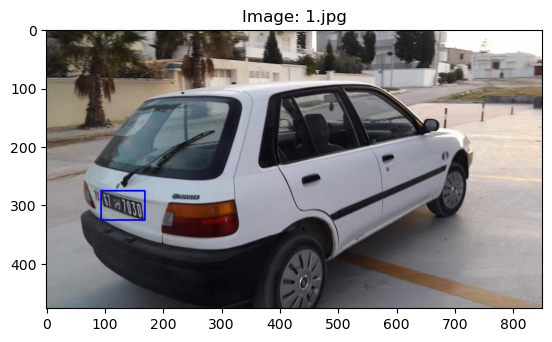

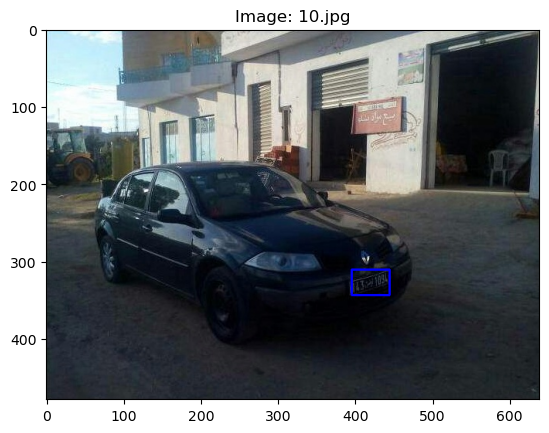

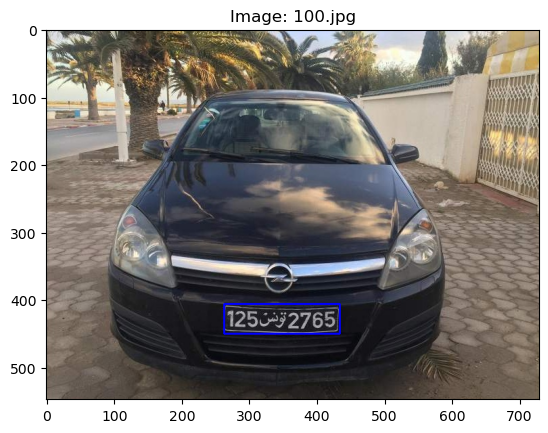

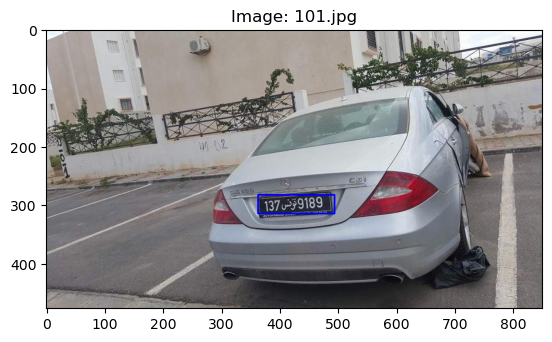

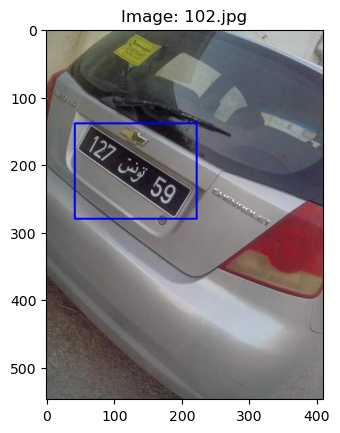

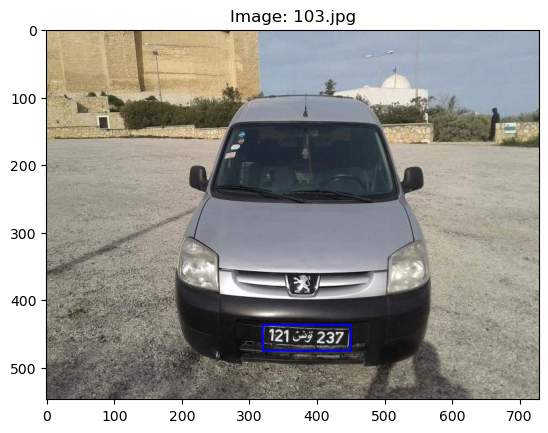

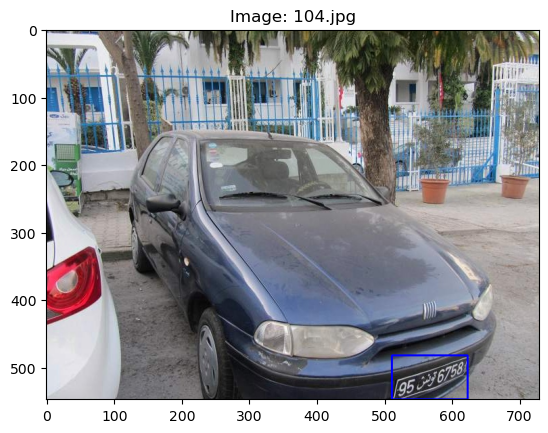

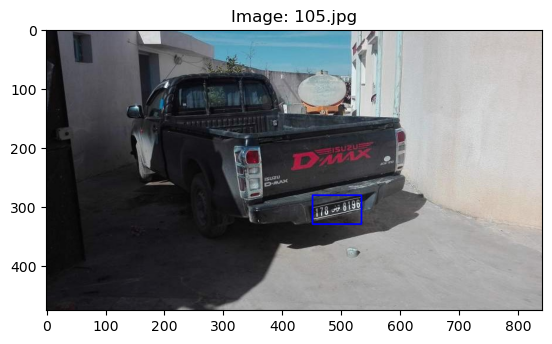

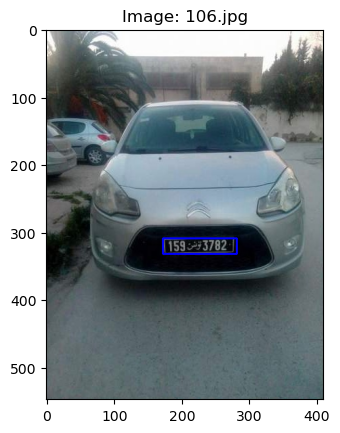

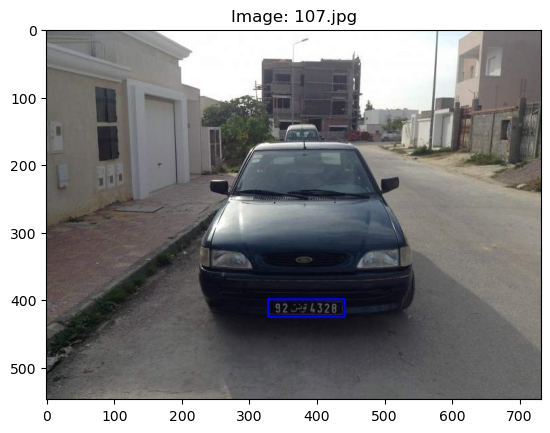

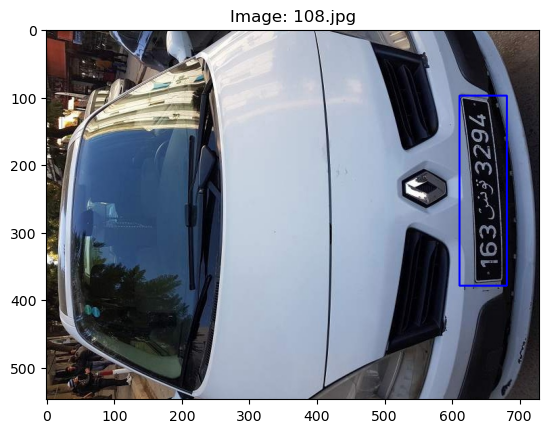

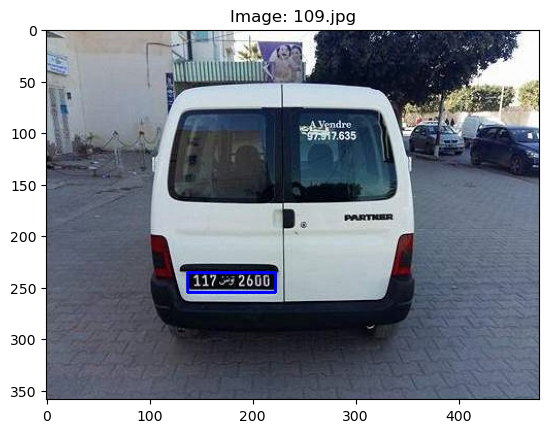

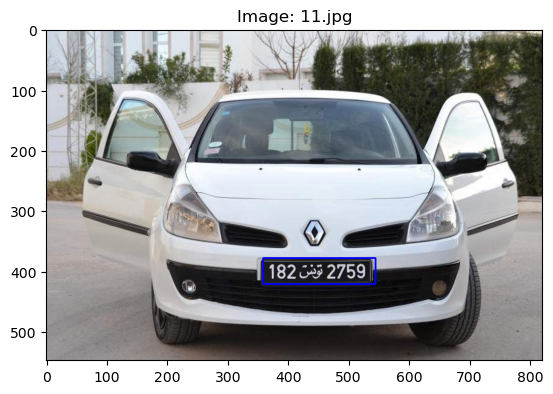

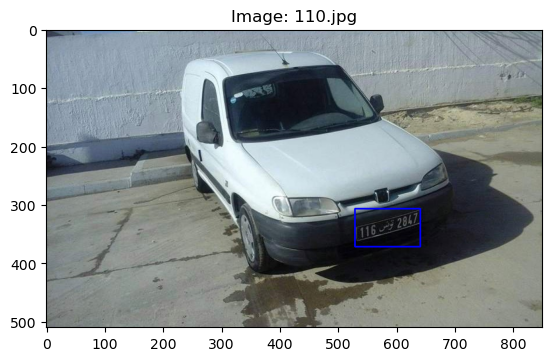

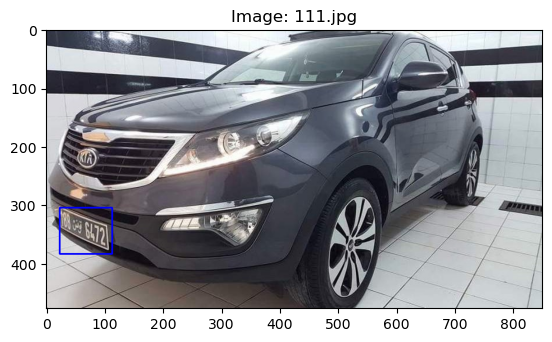

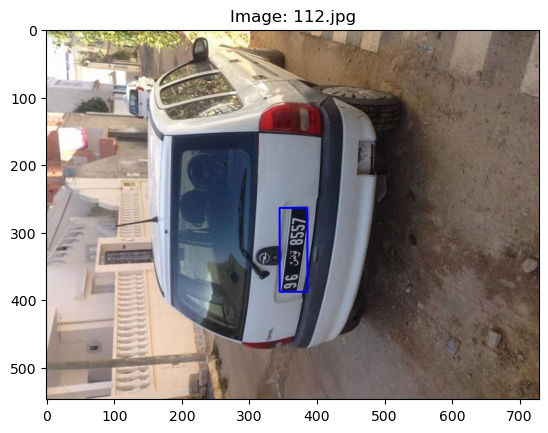

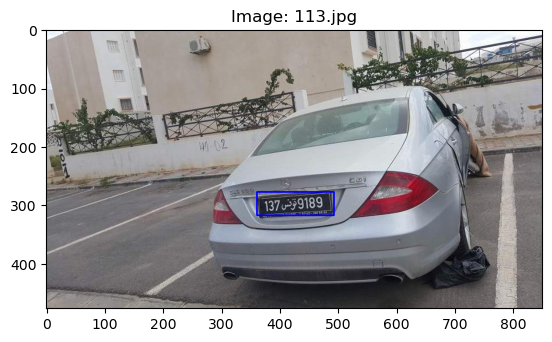

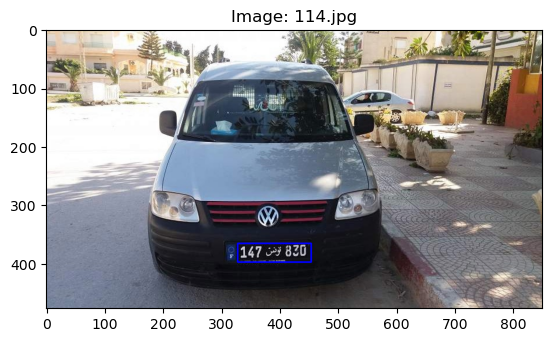

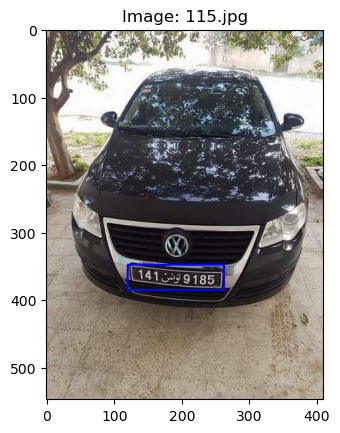

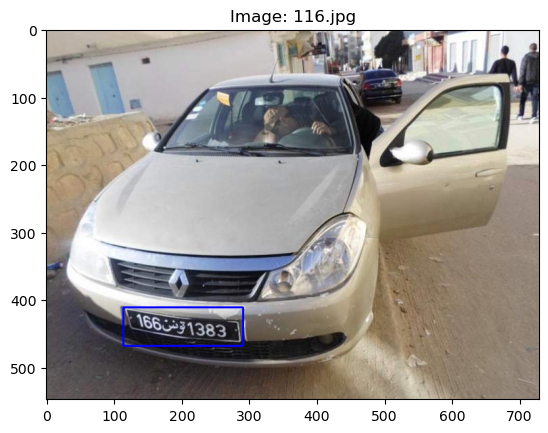

In [94]:

for i in range(20):
    sample = car_annots.iloc[i]
    img_path = os.path.join(car_img_dir, sample['img_id'])
    img = cv2.imread(img_path)
    xmin, ymin, xmax, ymax = map(int, [sample['xmin'], sample['ymin'], sample['xmax'], sample['ymax']])
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Image: {sample['img_id']}")
    plt.show()

In [106]:
print("Bounding Box Coordinates:")
print(f"xmin: {sample['xmin']}, xmax: {sample['xmax']}")
print(f"ymin: {sample['ymin']}, ymax: {sample['ymax']}")
print("Image shape:", img.shape)


Bounding Box Coordinates:
xmin: 94, xmax: 169
ymin: 276, ymax: 326
Image shape: (547, 729, 3)


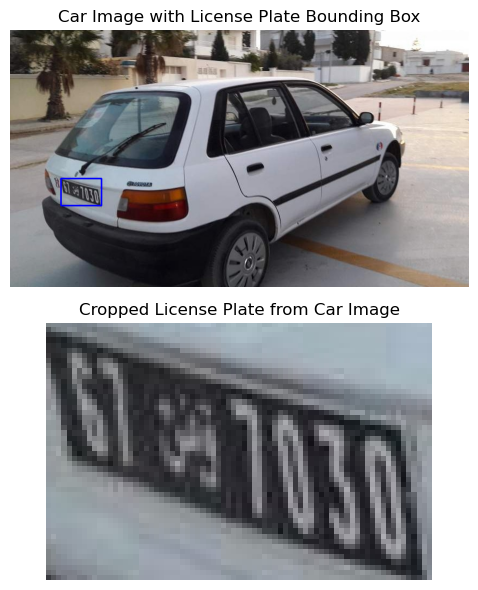

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

# --- Paths ---
car_img_dir = r"C:\Users\Siddiqui\Desktop\number plate dection\license_plates_detection_train"
car_annots_csv = r"C:\Users\Siddiqui\Desktop\number plate dection\Licplatesdetection_train.csv"

# --- Load CSV ---
car_annots = pd.read_csv(car_annots_csv)

# --- Get one sample ---
sample = car_annots.iloc[0]
img_path = os.path.join(car_img_dir, sample['img_id'])

# --- Read image ---
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Image not found: {img_path}")

# --- Parse bounding box (ensure numbers) ---
xmin = max(0, int(float(sample['xmin'])))
ymin = max(0, int(float(sample['ymin'])))
xmax = min(img.shape[1], int(float(sample['xmax'])))
ymax = min(img.shape[0], int(float(sample['ymax'])))

# --- Draw box ---
img_box = img.copy()
cv2.rectangle(img_box, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

# --- Crop plate ---
plate_crop = img[ymin:ymax, xmin:xmax]

# --- Plot both ---
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Show car image with box
axs[0].imshow(cv2.cvtColor(img_box, cv2.COLOR_BGR2RGB))
axs[0].set_title("Car Image with License Plate Bounding Box")
axs[0].axis('off')

# Show cropped plate
axs[1].imshow(cv2.cvtColor(plate_crop, cv2.COLOR_BGR2RGB))
axs[1].set_title("Cropped License Plate from Car Image")
axs[1].axis('off')

plt.tight_layout()
plt.show()
